In [1]:
# Import myfunc at cix folder
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../cix')

import myfuncs as mf

import pandas as pd

from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent

from rdkit.Chem import PandasTools as pt

from rdkit.Chem import Descriptors

import time

/home/gcolmenarejo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
##########################################
## Diversity analysis of input smiles
##########################################


# Init the time counter
start = time.time()


# Prepare the dataset
smis = mf.smif2smis('./train300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smis = list(set(smis))
smidft = mf.smis2smidf(smis)
art = mf.smidf2arena(smidft)

# Percentage of correct smiles
pd.DataFrame({"Initial n": n, "Percentage of Correct SMILES": [str(ncorr/float(n)*100)+"%"], "Unique n": len(smis)})

,Initial n,Percentage of Correct SMILES,Unique n
0,300000,100.0%,300000


In [3]:
# Diversity analysis
clb, fs, fg, ag_d = mf.divan(smidft, OnlyBu = True, arena = art)

Clustering time: 00:00:50
Diversity analysis time: 00:09:40


In [4]:
# Results
pd.DataFrame({"Number of Clusters": [len(clb)], 
              "Number of Frames": [len(fs)], 
              "Number of Generic Frames": [len(fg)],
              "Aggregated diversity": [ag_d]})

,Aggregated diversity,Number of Clusters,Number of Frames,Number of Generic Frames
0,63252.179198,194527,161518,70142


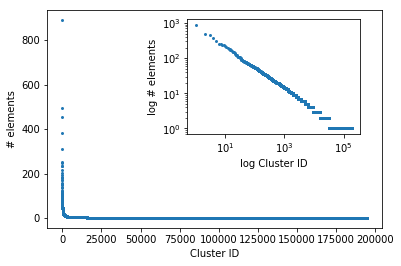

In [5]:
# Plot clusters distribution
d = pd.DataFrame({'clid':range(1, len(clb)+1), 'n':map(len, clb)})
mf.plotclus(d, "Cluster ID", "# elements", "log Cluster ID", "log # elements")

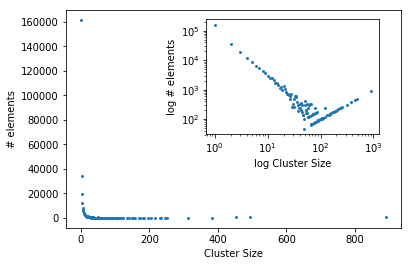

In [6]:
# Plot neighbor size distribution
d2 = pd.DataFrame({"clsize":d.n.groupby(d.n).unique(), "n":d.n.groupby(d.n).sum()})
mf.plotclus(d2, "Cluster Size", "# elements", "log Cluster Size", "log # elements")

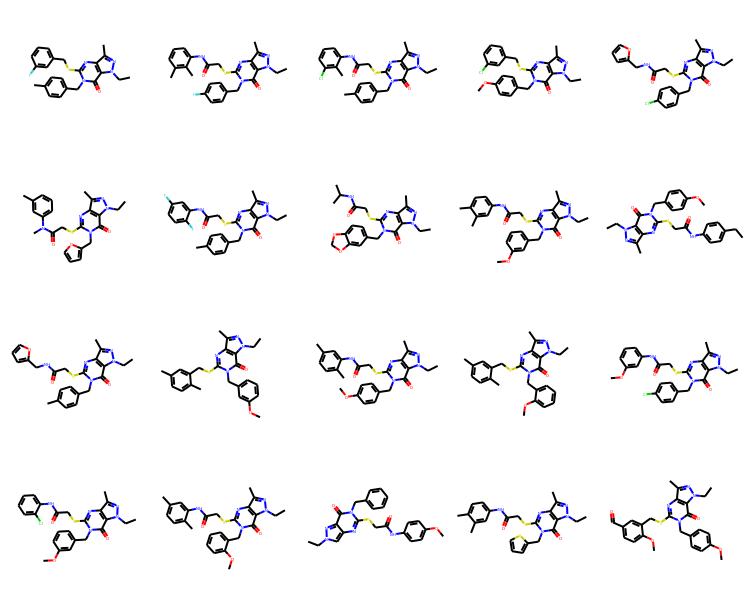

In [7]:
# Paint some random cluster to check everythings is fine
mf.paintmols(smidft['smiles'].loc[smidft.id.isin(clb[556])])

In [8]:
##########################################
## Diversity analysis of output unc smiles
##########################################

# Prepare the dataset
smis = mf.smif2smis('./unc300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smis = list(set(smis))
smidfu = mf.smis2smidf(smis)
aru = mf.smidf2arena(smidfu)

# Percentage of correct smiles
pd.DataFrame({"Initial n": n, 
              "Percentage of Correct SMILES": [str(ncorr/float(n)*100)+"%"], 
              "Unique n": len(smis)})

,Initial n,Percentage of Correct SMILES,Unique n
0,5000,99.12%,2295


In [9]:
# Diversity analysis
clb, fs, fg, ag_d = mf.divan(smidfu, OnlyBu = True, arena = aru)

# Results
pd.DataFrame({"Number of Clusters": [len(clb)], 
              "Number of Frames": [len(fs)], 
              "Number of Generic Frames": [len(fg)],
              "Aggreg Div": [ag_d]})

Clustering time: 00:00:00
Diversity analysis time: 00:00:02


,Aggreg Div,Number of Clusters,Number of Frames,Number of Generic Frames
0,342.489353,1057,859,551


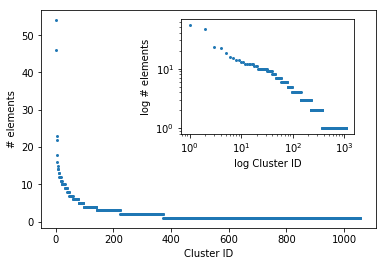

In [10]:
# Plot clusters distribution
d = pd.DataFrame({'clid':range(1, len(clb)+1), 'n':map(len, clb)})
mf.plotclus(d, "Cluster ID", "# elements", "log Cluster ID", "log # elements")

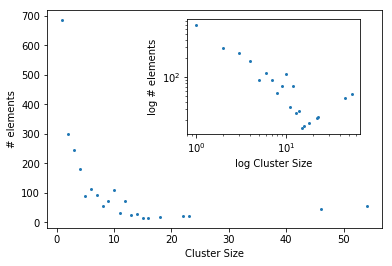

In [11]:
# Plot neighbor size distribution
d2 = pd.DataFrame({"clsize":d.n.groupby(d.n).unique(), "n":d.n.groupby(d.n).sum()})
mf.plotclus(d2, "Cluster Size", "# elements", "log Cluster Size", "log # elements")

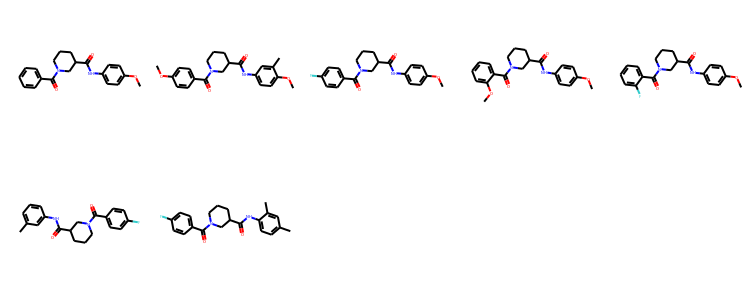

In [12]:
# Paint some random cluster to check everythings is fine
mf.paintmols(smidfu['smiles'].loc[smidfu.id.isin(clb[55])])

In [13]:
##########################################
## Diversity analysis of output con smiles
##########################################

# Prepare the dataset
smis = mf.smif2smis('./con300000.smi')
ncorr, n, smis, wrongsmis = mf.corrsmis(smis)
smis = list(set(smis))
smidfc = mf.smis2smidf(smis)
arc = mf.smidf2arena(smidfc)

# Percentage of correct smiles
pd.DataFrame({"Initial n": n, 
              "Percentage of Correct SMILES": [str(ncorr/float(n)*100)+"%"], 
              "Unique n": len(smis)})

,Initial n,Percentage of Correct SMILES,Unique n
0,5000,100.0%,730


In [14]:
# Diversity analysis
clb, fs, fg, ag_d = mf.divan(smidfc, OnlyBu = True, arena = arc)

# Results
pd.DataFrame({"Number of Clusters": [len(clb)], 
              "Number of Frames": [len(fs)], 
              "Number of Generic Frames": [len(fg)],
              "Aggreg Div": [ag_d]})

Clustering time: 00:00:00
Diversity analysis time: 00:00:00


,Aggreg Div,Number of Clusters,Number of Frames,Number of Generic Frames
0,169.124131,495,294,133


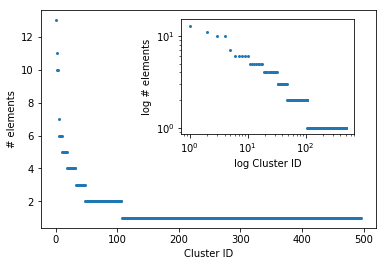

In [15]:
# Plot clusters distribution
d = pd.DataFrame({'clid':range(1, len(clb)+1), 'n':map(len, clb)})
mf.plotclus(d, "Cluster ID", "# elements", "log Cluster ID", "log # elements")

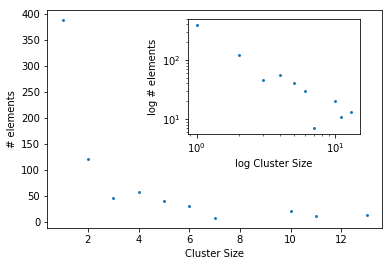

In [16]:
# Plot neighbor size distribution
d2 = pd.DataFrame({"clsize":d.n.groupby(d.n).unique(), "n":d.n.groupby(d.n).sum()})
mf.plotclus(d2, "Cluster Size", "# elements", "log Cluster Size", "log # elements")

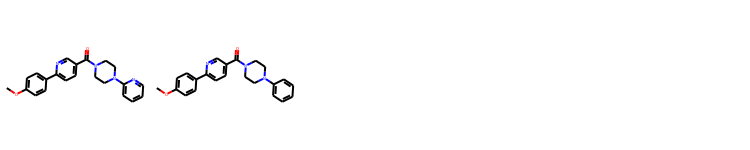

In [17]:
# Paint some random cluster to check everythings is fine
mf.paintmols(smidfc['smiles'].loc[smidfc.id.isin(clb[55])])

Text(0.5,0,'MolWt')

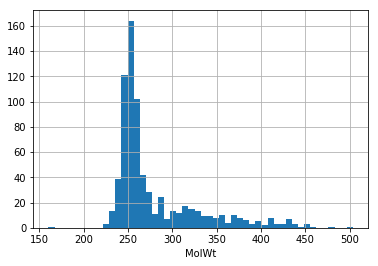

In [18]:
# Paint the histogram of property
pt.AddMoleculeColumnToFrame(smidfc,"smiles")
smidfc['mw'] = smidfc['ROMol'].map(Descriptors.MolWt)
del smidfc["ROMol"]
ax = smidfc['mw'].hist(bins = 50)
ax.set_xlabel("MolWt")

In [19]:
##########################################
## Novelty analysis of uncond smiles
##########################################

news, fraq, newfraqs, gfraq, newgfraqs = mf.novan(smidfu, smidft, th = 0.7, arq = aru, art = art)

Arenas creation time: 00:00:00
Novelty analysis time: 00:07:08


In [20]:
dic = {"# mols":[5000], "new structures(%)":[round(100*len(news)/5000.,2)],\
       "# frames":[len(fraq)], "new frames(%)": [round(100*len(newfraqs)/float(len(fraq)),2)],\
       "# gen frames":[len(gfraq)], "new gen frames(%)": [round(100*len(newgfraqs)/float(len(gfraq)),2)]}
pd.DataFrame(dic, columns = ["# mols", "new structures(%)", "# frames", "new frames(%)", "# gen frames", "new gen frames(%)"])

,# mols,new structures(%),# frames,new frames(%),# gen frames,new gen frames(%)
0,5000,3.52,859,32.36,551,11.98


In [21]:
##########################################
## Novelty analysis of cond smiles
##########################################

news, fraq, newfraqs, gfraq, newgfraqs = mf.novan(smidfc, smidft, th = 0.7, arq = arc, art = art)

Arenas creation time: 00:00:00
Novelty analysis time: 00:07:23


In [22]:
dic = {"# mols":[5000], "new structures(%)":[round(100*len(news)/5000.,2)],\
       "# frames":[len(fraq)], "new frames(%)": [round(100*len(newfraqs)/float(len(fraq)),2)],\
       "# gen frames":[len(gfraq)], "new gen frames(%)": [round(100*len(newgfraqs)/float(len(gfraq)),2)]}
pd.DataFrame(dic, columns = ["# mols", "new structures(%)", "# frames", "new frames(%)", "# gen frames", "new gen frames(%)"])

,# mols,new structures(%),# frames,new frames(%),# gen frames,new gen frames(%)
0,5000,2.28,294,17.35,133,1.5


In [23]:
# End the time counter for the whole notebook
end = time.time()
eltime = end - start
print('Exp0Analysis execution time: ' + time.strftime("%H:%M:%S", time.gmtime(eltime)))

Exp0Analysis execution time: 00:33:30
